<a href="https://colab.research.google.com/github/usta-cyber/Deep-Learning-using-python/blob/main/ANN%26SKL_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Linear Regression using Artificil Neural Networks (ANN)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']


In [4]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)

print(data.head(20))
print(data.info())

       crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [7]:
summary = data.describe()
print(summary)
summary = summary.transpose()
print(summary)

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [8]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler

In [12]:
print(data)
scaler = MinMaxScaler()
data1=scaler.fit(data)
print(data1)

        crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [13]:
print(data1)

MinMaxScaler()


In [16]:
DataScaled = scaler.fit_transform(data)
print(DataScaled)
DataScaled = pd.DataFrame(DataScaled, columns=BHNames)
print(DataScaled)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]
         crim    zn     indus  chas       nox        rm       age       dis  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    

In [17]:
summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409 

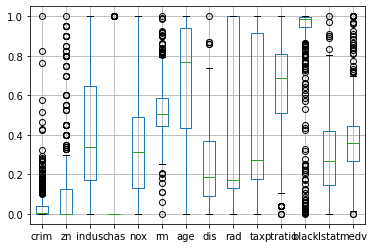

In [18]:
import matplotlib.pyplot as plt
boxplot = DataScaled.boxplot(column=BHNames)
plt.show()

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

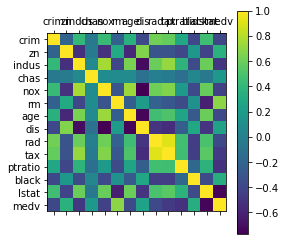

In [19]:
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['medv']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X shape =  (506, 13)
Y shape =  (506,)
X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)


In [21]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In [22]:
#first input and first hidden layer
model = Sequential()
model.add(Dense(20,input_dim=13, activation='relu'))

#second hidden layer
model.add(Dense(10, activation='relu'))

#output layer
model.add(Dense(1, activation='linear'))


In [23]:
#compile ANN
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['accuracy'])


In [24]:
#fit and display the summary 
model.fit(X_train,Y_train, epochs=1000, verbose=1)


Epoch 1/1000
12/12 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.0056 
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.0085
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.0113
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.0113
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.0141
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.0141
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.0198
Epoch 8/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.0254
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.0254
Epoch 10/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.025

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Testing the test dataset
Y_predKM =  model.predict(X_test)
score = model.evaluate(X_test,Y_test, verbose=0)
print(score[0])

5/5 [==============================] - 0s 4ms/step
0.006923803593963385


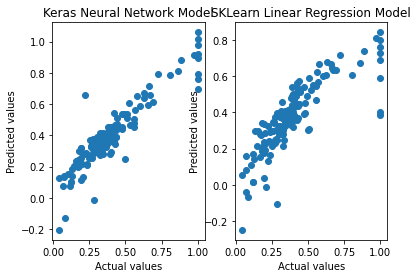

Linear Regression Model Mean Square Error
0.015159030964982022


In [33]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)

